<a href="https://colab.research.google.com/github/jonielbarreto/dataVisualization/blob/main/dataVisualization03/dataVisualization_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization - Basic Functions 03
## Visualization of categorical data: Proportions
# --------------------------------------------------------------------------------------------------------------------------------------------
##### Create by Joniel B Barreto on July 10th, 2022
##### Copyright (c) 2022 jonielbarreto. All rights reserved.

In [ ]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the dataset
#df = pd.read_csv("https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro04/oficina/arquivos/dadosoficina04.txt")
df = pd.read_csv('games.txt');
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Grouping games by genre
games_genre = df.groupby(by='Genre').sum()
games_genre

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,26441383,6531731.0,877.83,525.00,159.95,187.38,1751.18
Adventure,14831165,2562375.0,105.80,64.13,52.07,16.81,239.04
Fighting,6484242,1675871.0,223.59,101.32,87.35,36.68,448.91
Misc,14889052,3432412.0,410.24,215.98,107.76,75.32,809.96
Platform,6137545,1755347.0,447.05,201.63,130.77,51.59,831.37
Puzzle,5603136,1144994.0,123.78,50.78,57.31,12.55,244.95
Racing,9943933,2457934.0,359.42,238.39,56.69,77.27,732.04
Role-Playing,12032228,2952379.0,327.28,188.06,352.31,59.61,927.37
Shooter,9653872,2571588.0,582.60,313.27,38.28,102.69,1037.37


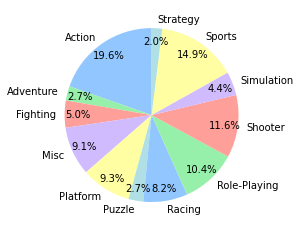

In [ ]:
# The function plt.pie () plots a pie chart, the basic parameters of the function are labels and x
# The autopct parameter takes a formatted string indicating how the percentages should be displayed
# For style.use() you can find more option in https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
# startangle sets the start angle and pctdistance sets the distance of the text from the center of the circle
plt.style.use('seaborn-pastel')
plt.pie(x=games_genre['Global_Sales'], labels = games_genre.index, autopct='%1.1f%%',startangle=90, pctdistance=0.85)
plt.show()

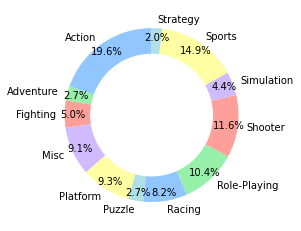

In [ ]:
# Matplotlib doesn't have a function of its own to create donut plots
    # but they can be created by making a pie chart and drawing a white circle in the center
plt.pie(x=games_genre['Global_Sales'], labels = games_genre.index, autopct='%1.1f%%',startangle=90, pctdistance=0.90)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

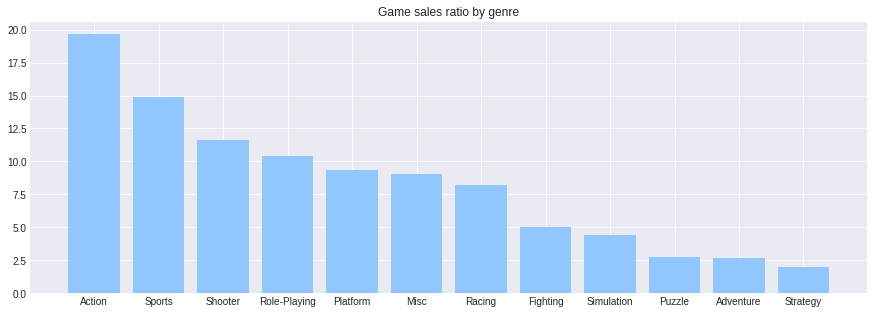

In [ ]:
# Matplotlib does not have its own function to use percentage bar graphs
# It is necessary to calculate vectors with the desired percentages, sort and display them, using the bar() function
games_genre = games_genre.sort_values(by='Global_Sales',ascending=False)
percentages = games_genre['Global_Sales']*100.0/games_genre['Global_Sales'].sum()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5))
plt.bar(games_genre.index,percentages)
plt.title('Game sales ratio by genre')
plt.show()

1. Create a visualization that shows the proportion of global sales across genres of Nintendo company games

In [ ]:
# Create Nintendo company game database
df_Nintendo = df[df['Publisher'] == 'Nintendo']

In [ ]:
# Grouping Nintendo company games into genres, attributes are added
df_Nintendo = df_Nintendo.groupby(by='Genre').sum()

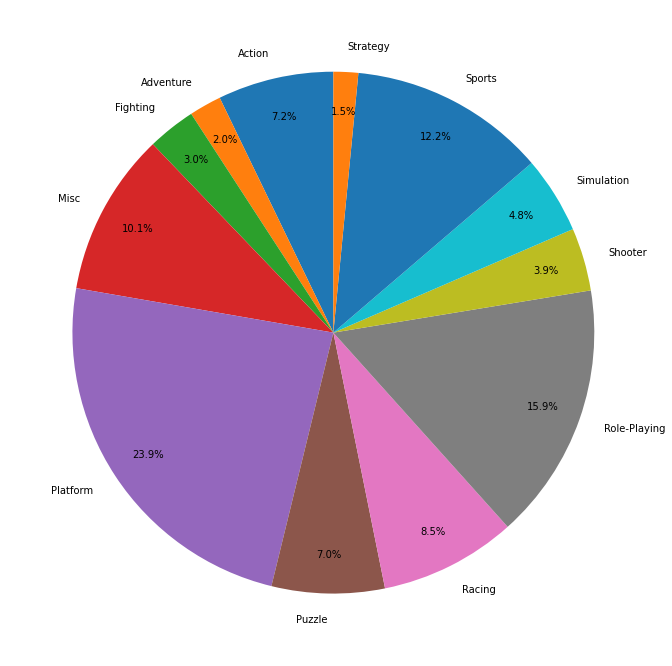

In [ ]:
# Graph of the proportion of global sales between game genres of Nintendo company
plt.figure(figsize=(12,12))
plt.pie(x=df_Nintendo['Global_Sales'], labels = df_Nintendo.index, autopct='%1.1f%%',startangle=90, pctdistance=0.85)
plt.show()

2. Create a visualization that shows the proportion of games per platform as of year 2015.

In [ ]:
# Create game database from 2015
df_plat = df[df['Year'] >= 2015]

In [ ]:
# Grouping the game dataset by platform
df_plat = df_plat.groupby(by='Platform').count()

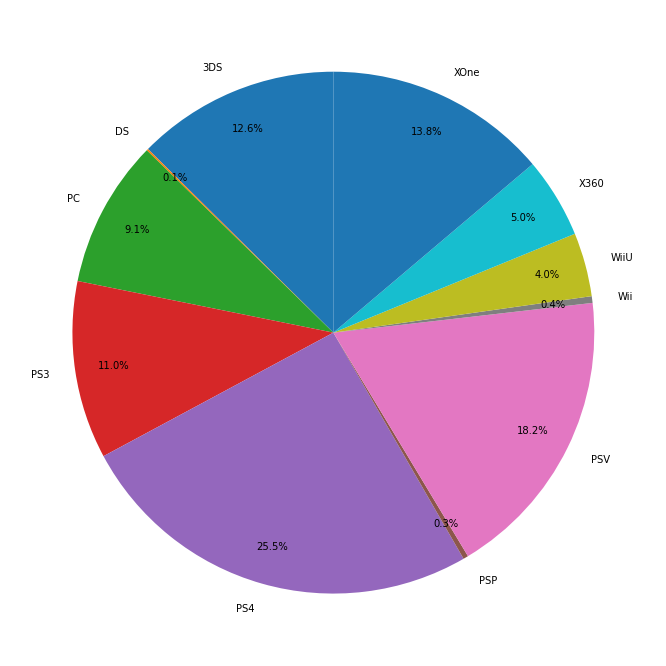

In [ ]:
# Graph of the proportion of number of games per platform from the year 2015.
plt.figure(figsize=(12,12))
plt.pie(x=df_plat['Name'], labels = df_plat.index, autopct='%1.1f%%',startangle=90, pctdistance=0.85)
plt.show()